<a href="https://colab.research.google.com/github/stampejp/data-mining/blob/master/labs/11_wk11_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11 Lab: Decision Trees, Random Forests, and Feature Importance

<a href="https://colab.research.google.com/github/bradleyboehmke/uc-bana-4080/blob/main/labs/11_wk11_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 11! This lab introduces you to tree-based machine learning methods—decision trees and random forests—along with techniques for understanding which features drive your model's predictions. You'll learn how these powerful algorithms automatically discover non-linear patterns and interactions in data, making them invaluable tools for real-world business applications.

Today's lab has two distinct parts: First, your TA will walk through a complete analysis using the Boston housing dataset, demonstrating how to build, evaluate, and interpret tree-based models. Then, you'll apply these techniques independently to the Breast Cancer Wisconsin dataset, building on your classification work from Week 10.

## 🎯 Learning Objectives
By the end of this lab, you will be able to:
- Build and interpret decision tree models for regression and classification problems
- Construct random forest models and tune key hyperparameters
- Compare model performance to select the best approach for a given problem
- Calculate and interpret feature importance using permutation importance
- Create and interpret partial dependence plots to understand feature effects

## 📚 This Lab Reinforces
- **Chapter 25: Decision Trees - Foundations and Interpretability**
- **Chapter 26: Random Forests - Ensemble Power and Robustness**
- **Chapter 27: Understanding Feature Importance**

## 🕐 Estimated Time & Structure
**Total Time:** 75 minutes  
**Mode:** TA-led demonstration + group work (serves as homework)

- **[0–30 min]** Part 1: TA walkthrough with Boston housing data
- **[30–35 min]** Class Q&A and transition
- **[35–70 min]** Part 2: Independent group challenges with Breast Cancer data
- **[70–75 min]** Wrap-up and reflection

You are encouraged to work in small groups of **2–4 students** for Part 2.

## 💡 Why This Matters
Tree-based methods are among the most widely used machine learning algorithms in business. Unlike linear models that assume straight-line relationships, decision trees and random forests automatically discover complex patterns, threshold effects, and feature interactions. Banks use them for credit risk assessment, hospitals for readmission prediction, and retailers for customer churn modeling. Feature importance techniques help you understand *why* your model makes certain predictions—critical for building stakeholder trust, debugging models, and making data-driven business decisions.

## Setup
We'll work with two datasets today: the Boston housing dataset (for regression with the TA) and the Breast Cancer Wisconsin dataset (for your independent classification analysis).

In [3]:
# You may need to install the ISLP package. If so, uncomment the below line:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=d1fa1d86d9afd2659ec5d5c1900b79267571f368b80de724d1d68ca4298bcd40
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [5]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from ISLP import load_data
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42

print("✅ All libraries imported successfully!")
print("🌳 Ready to explore tree-based methods!")

✅ All libraries imported successfully!
🌳 Ready to explore tree-based methods!


## Part 1 — TA Walkthrough: Boston Housing Data (30 minutes)

Your TA will demonstrate the complete workflow for tree-based modeling using the Boston housing dataset. This is a regression problem where we predict median home values based on neighborhood characteristics.

**Key Steps in This Walkthrough:**
1. Load and explore the Boston housing data
2. Prepare data and create train/test split
3. Build and evaluate a decision tree regression model
4. Build and evaluate a random forest regression model
5. Calculate and interpret feature importance
6. Create partial dependence plots to understand feature effects

**Follow along and take notes** — you'll apply this same process to the Breast Cancer data in Part 2!

### Step 1: Load and Explore Data

**Context:** The Boston housing dataset contains information about housing in the Boston area. Each observation represents a neighborhood, with features like crime rate, property tax rate, and pupil-teacher ratio. Our goal is to predict the median home value (`medv`).

**Reference:** See Chapter 25, "Building Your First Decision Tree" section for data preparation details.

In [6]:
# Load Boston housing data
Boston = load_data('Boston')

print("Boston Housing Dataset Overview:")
print(f"Shape: {Boston.shape}")
print(f"\nFeatures: {Boston.columns.tolist()}")
print(f"\nFirst few rows:")
print(Boston.head())

# Check for missing values
print(f"\nMissing values: {Boston.isnull().sum().sum()}")

# Basic statistics on target variable
print(f"\nTarget variable (medv) statistics:")
print(Boston['medv'].describe())

Boston Housing Dataset Overview:
Shape: (506, 13)

Features: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

First few rows:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  

Missing values: 0

Target variable (medv) statistics:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: floa

### Step 2: Prepare Data and Split

**Key Concept:** We separate features (X) from the target variable (y), then split into training and test sets to evaluate model performance on unseen data.

**Reference:** Chapter 25 reviews train/test splitting for tree-based models.

In [7]:
# Prepare features and target
X_boston = Boston.drop('medv', axis=1)
y_boston = Boston['medv']

# Create 70-30 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_boston, y_boston, test_size=0.3, random_state=RANDOM_STATE
)

print(f"Training set: {len(X_train)} observations")
print(f"Test set: {len(X_test)} observations")
print(f"\nNumber of features: {X_train.shape[1]}")

Training set: 354 observations
Test set: 152 observations

Number of features: 12


### Step 3: Build Decision Tree Model

**Key Concept:** Decision trees make predictions by learning a series of yes/no questions about features. Unlike linear models that assume straight-line relationships, trees automatically discover non-linear patterns and interactions.

**Reference:** Chapter 25, "Regression Trees" section explains how trees minimize MSE to find optimal splits.

In [8]:
# Build decision tree with max_depth=5 to prevent overfitting
dt_model = DecisionTreeRegressor(max_depth=5, random_state=RANDOM_STATE)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluate performance
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
train_r2_dt = r2_score(y_train, y_pred_train_dt)
test_r2_dt = r2_score(y_test, y_pred_test_dt)

print("Decision Tree Performance:")
print(f"Training RMSE: ${train_rmse_dt:,.2f}")
print(f"Test RMSE: ${test_rmse_dt:,.2f}")
print(f"Training R²: {train_r2_dt:.3f}")
print(f"Test R²: {test_r2_dt:.3f}")

Decision Tree Performance:
Training RMSE: $2.54
Test RMSE: $4.32
Training R²: 0.927
Test R²: 0.749


### Step 4: Build Random Forest Model

**Key Concept:** Random forests combine many decision trees (each trained on a different random sample of data) to make more accurate and stable predictions. While a single tree can be unstable, the wisdom of crowds from many diverse trees produces robust results.

**Reference:** Chapter 26, "How Random Forests Work" section explains bootstrap sampling and feature randomness.

In [9]:
# Build random forest with 100 trees
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=RANDOM_STATE
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate performance
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print("Random Forest Performance:")
print(f"Training RMSE: ${train_rmse_rf:,.2f}")
print(f"Test RMSE: ${test_rmse_rf:,.2f}")
print(f"Training R²: {train_r2_rf:.3f}")
print(f"Test R²: {test_r2_rf:.3f}")

# Compare models
print(f"\n📊 Model Comparison:")
print(f"Random Forest improves test R² by {test_r2_rf - test_r2_dt:.3f} over single tree")

Random Forest Performance:
Training RMSE: $1.53
Test RMSE: $3.12
Training R²: 0.973
Test R²: 0.870

📊 Model Comparison:
Random Forest improves test R² by 0.121 over single tree


### Step 5: Calculate and Interpret Feature Importance

**Key Concept:** Feature importance tells us which variables have the strongest influence on predictions. For random forests, we'll use **permutation importance**, which measures how much performance drops when we shuffle each feature's values.

**Why This Matters:** Understanding which features drive predictions helps us build stakeholder trust, validate that the model makes business sense, and identify which factors to focus on.

**Reference:** Chapter 27, "Permutation Importance" section explains this model-agnostic approach.

Feature Importance (Permutation Method):
    feature  importance
11    lstat    0.479885
5        rm    0.411344
7       dis    0.074978
0      crim    0.029745
10  ptratio    0.027964
4       nox    0.014870
9       tax    0.012059
6       age    0.009574
2     indus    0.004102
8       rad    0.001059
3      chas    0.000575
1        zn   -0.000112


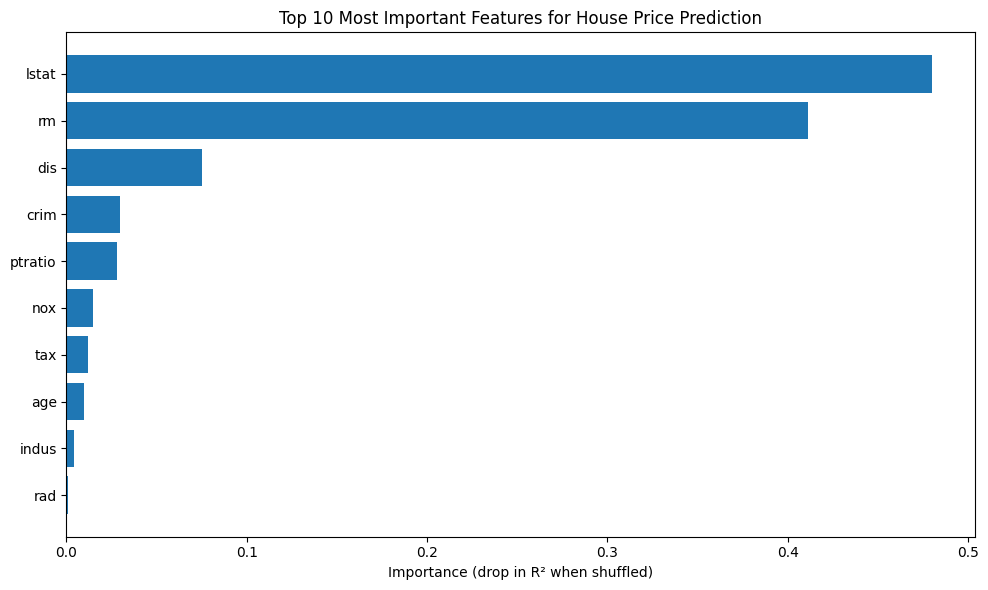


💡 Interpretation: The top feature is 'lstat' with importance 0.480
This means shuffling this feature causes R² to drop by 0.480


In [10]:
# Calculate permutation importance on test set
perm_importance = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    scoring='r2'
)

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

print("Feature Importance (Permutation Method):")
print(importance_df)

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance (drop in R² when shuffled)')
plt.title('Top 10 Most Important Features for House Price Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n💡 Interpretation: The top feature is '{importance_df.iloc[0]['feature']}' with importance {importance_df.iloc[0]['importance']:.3f}")
print(f"This means shuffling this feature causes R² to drop by {importance_df.iloc[0]['importance']:.3f}")

### Step 6: Create Partial Dependence Plots

**Key Concept:** Partial dependence plots (PDPs) show how predictions change as we vary one feature while holding others constant. They reveal the *shape* of the relationship between a feature and the target.

**Why This Matters:** While feature importance tells us *which* features matter, PDPs tell us *how* they influence predictions. Do prices increase linearly with square footage? Is there a threshold effect?

**Reference:** Chapter 27, "Exploring Prediction Behavior Across Variables" section covers PDPs in detail.

Creating Partial Dependence Plot for: lstat


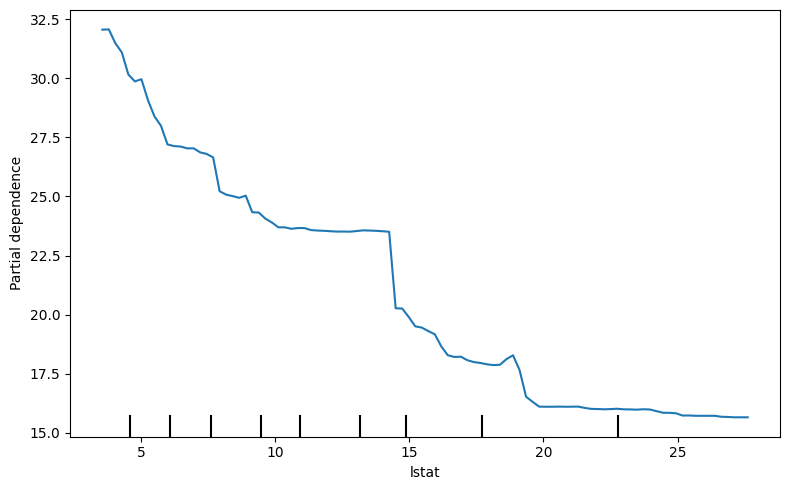


💡 How to read this plot:
- X-axis: Values of lstat
- Y-axis: Predicted median home value (in $1000s)
- The line shows how predictions change as lstat increases
- Steep slopes indicate strong effects; flat regions indicate weak effects


In [11]:
# Create PDP for the most important feature
top_feature = importance_df.iloc[0]['feature']

print(f"Creating Partial Dependence Plot for: {top_feature}")

# Create PDP
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_train,
    features=[top_feature],
    ax=ax
)
plt.tight_layout()
plt.show()

print(f"\n💡 How to read this plot:")
print(f"- X-axis: Values of {top_feature}")
print(f"- Y-axis: Predicted median home value (in $1000s)")
print(f"- The line shows how predictions change as {top_feature} increases")
print(f"- Steep slopes indicate strong effects; flat regions indicate weak effects")

### ✅ Part 1 Summary

**What we demonstrated:**
1. ✓ Built a decision tree regression model
2. ✓ Built a random forest that outperformed the single tree
3. ✓ Identified the most important features using permutation importance
4. ✓ Visualized how the top feature influences predictions using PDPs

**Key Takeaways:**
- Random forests typically outperform single decision trees
- Feature importance helps identify which variables drive predictions
- PDPs reveal *how* features influence the outcome

**Next:** You'll apply this same workflow to the Breast Cancer dataset!

## Class Discussion/Q&A (5 minutes)

Before moving to Part 2, let's address any questions about the workflow:

**Discussion prompts:**
- How do decision trees differ from linear regression in terms of the relationships they can capture?
- Why did the random forest outperform the single decision tree?
- What does feature importance tell us that model performance metrics don't?
- How would you explain a partial dependence plot to a non-technical stakeholder?

**Common questions:**
- *"How do I choose max_depth for a decision tree?"* → Start with smaller values (3-10) and increase if needed. Too deep = overfitting.
- *"How many trees should I use in a random forest?"* → Typically 100-500. More trees = better performance but diminishing returns.
- *"What's the difference between impurity-based and permutation importance?"* → Impurity is faster but biased toward high-cardinality features; permutation is more reliable but slower.

## Part 2 — Independent Group Challenges: Breast Cancer Classification (35 minutes)

Now it's your turn! You'll apply the same tree-based modeling workflow to the **Breast Cancer Wisconsin dataset** that you worked with in Week 10. This time, instead of logistic regression, you'll use decision trees and random forests for classification.

**Scenario:** You're a data scientist at a medical diagnostics company. Your team needs to build a model that predicts whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on cell nucleus measurements from medical images. Understanding which features drive these predictions is critical for clinical validation and physician trust.

### 🚨 Important Guidelines for Part 2

For the challenges below:
- **NO starter code provided** — you'll write everything from scratch
- **DO NOT use AI tools** (ChatGPT, Copilot, etc.) to generate code
- **Work in groups of 2-4 students** and collaborate
- **Ask the instructor for help** if you get stuck
- **Refer to the chapters** for syntax and examples
- **This section serves as your homework** — complete all challenges

### 📊 Data Preparation (PROVIDED)

We'll load and prepare the Breast Cancer data for you. Your challenges begin with splitting the data.

In [12]:
# Load Breast Cancer Wisconsin dataset (PROVIDED)
url = "https://raw.githubusercontent.com/bradleyboehmke/uc-bana-4080/refs/heads/main/data/breast_cancer.csv"
cancer_data = pd.read_csv(url)

print("✅ Breast Cancer Wisconsin dataset loaded")
print(f"Shape: {cancer_data.shape}")
print(f"\nTarget variable distribution:")
print(cancer_data['diagnosis'].value_counts())
print(f"\nBaseline: {(cancer_data['diagnosis']=='M').mean():.1%} malignant")

✅ Breast Cancer Wisconsin dataset loaded
Shape: (569, 31)

Target variable distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Baseline: 37.3% malignant


In [13]:
# Prepare features and target (PROVIDED)
# Create binary target: 1=Malignant, 0=Benign
y_cancer = (cancer_data['diagnosis'] == 'M').astype(int)

# Select all numeric features (exclude diagnosis column)
X_cancer = cancer_data.drop('diagnosis', axis=1)

print(f"✅ Data prepared for modeling")
print(f"Features: {X_cancer.shape[1]} columns")
print(f"Target: {len(y_cancer)} observations")
print(f"\nFeature names:")
print(X_cancer.columns.tolist())

✅ Data prepared for modeling
Features: 30 columns
Target: 569 observations

Feature names:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Challenge 1 — Split the Data into Training and Test Sets

**Question:** Create a 70-30 train/test split of the breast cancer data. Use `RANDOM_STATE` for reproducibility and `stratify=y_cancer` to maintain the class balance in both sets.

**Your Task:**
- Split `X_cancer` and `y_cancer` into training and test sets
- Use 70% for training, 30% for testing
- Name your variables: `X_train_cancer`, `X_test_cancer`, `y_train_cancer`, `y_test_cancer`
- Print the sizes of both sets and the malignant rate in each
- **IMPORTANT**: make sure you use `random_state=RANDOM_STATE`

**Hint:** Review Chapter 25, "Regression Trees" section for the train/test split syntax. Don't forget to use `stratify=y_cancer` to ensure both sets have similar proportions of malignant/benign cases!

In [15]:
# Set random state for reproducibility
RANDOM_STATE = 42

# Your turn: split the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=RANDOM_STATE, stratify=y_cancer
)

print(f"Training set: {len(X_train_cancer)} observations")
print(f"Test set: {len(X_test_cancer)} observations")

# Calculate and print malignant rates
train_malignant_rate = y_train_cancer.mean()
test_malignant_rate = y_test_cancer.mean()

print(f"\nTraining set malignant rate: {train_malignant_rate:.1%}")
print(f"Test set malignant rate: {test_malignant_rate:.1%}")

Training set: 398 observations
Test set: 171 observations

Training set malignant rate: 37.2%
Test set malignant rate: 37.4%


### Challenge 2 — Build Decision Trees with Different Depths

**Question:** Build decision tree classifiers with different `max_depth` values and compare their performance. This will help you understand the bias-variance tradeoff.

**Your Task:**
1. Test the following `max_depth` values: **3, 5, 10**
2. For each depth:
   - Create a `DecisionTreeClassifier` with that `max_depth` and `random_state=RANDOM_STATE`
   - Fit it on the training data
   - Calculate **training accuracy** and **test accuracy**
3. Store the results and identify which depth gives the best test accuracy
4. Create a plot showing how training and test accuracy change with depth

**Hint:** Chapter 25, "Tree Parameters and Overfitting" section explains `max_depth`. You'll need to use `DecisionTreeClassifier` (not Regressor since this is classification). Use `.score()` method to get accuracy.

**Expected pattern:** Training accuracy should increase with depth, but test accuracy may plateau or decrease (overfitting).

Depth 3: Train Accuracy = 0.962, Test Accuracy = 0.918
Depth 5: Train Accuracy = 0.985, Test Accuracy = 0.906
Depth 10: Train Accuracy = 1.000, Test Accuracy = 0.901

Decision Tree Performance Summary:


,train_accuracy,test_accuracy
max_depth,,
3,0.962312,0.918129
5,0.984925,0.906433
10,1.000000,0.900585


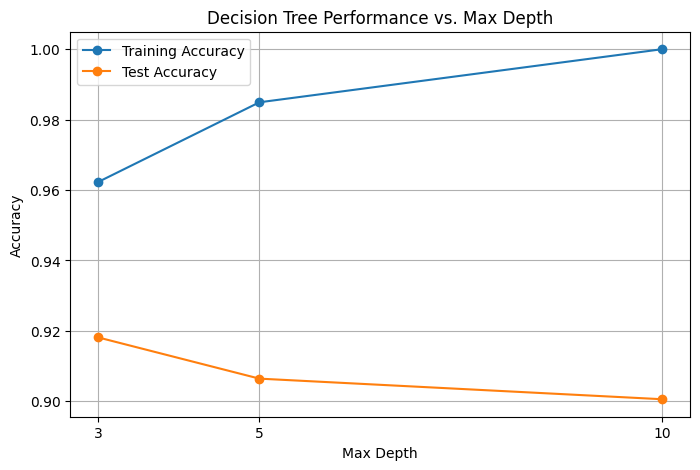

In [16]:
# Your turn: test different tree depths

depths = [3, 5, 10]
dt_performance = {}

for depth in depths:
    # Create and fit the decision tree classifier
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    dt_model.fit(X_train_cancer, y_train_cancer)

    # Calculate training and test accuracy
    train_accuracy = dt_model.score(X_train_cancer, y_train_cancer)
    test_accuracy = dt_model.score(X_test_cancer, y_test_cancer)

    dt_performance[depth] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    }

    print(f"Depth {depth}: Train Accuracy = {train_accuracy:.3f}, Test Accuracy = {test_accuracy:.3f}")

# Store results for comparison
dt_performance_df = pd.DataFrame.from_dict(dt_performance, orient='index')
dt_performance_df.index.name = 'max_depth'
print("\nDecision Tree Performance Summary:")
display(dt_performance_df)

# Plot performance vs depth
plt.figure(figsize=(8, 5))
plt.plot(dt_performance_df.index, dt_performance_df['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(dt_performance_df.index, dt_performance_df['test_accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs. Max Depth')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

### Challenge 3 — Build Random Forests with Different Hyperparameters

**Question:** Now build random forest classifiers and tune hyperparameters to find the best combination for predicting breast cancer.

**Your Task:**
Test the following hyperparameter combinations:

| Model | n_estimators | max_depth | max_features |
|-------|--------------|-----------|-------------|
| RF1   | 100          | 10        | 'sqrt'      |
| RF2   | 200          | 15        | 'sqrt'      |
| RF3   | 300          | 20        | 10          |
| RF4   | 500          | None      | 'sqrt'      |

For each model:
1. Create a `RandomForestClassifier` with the specified hyperparameters (use `random_state=RANDOM_STATE`)
2. Fit on training data
3. Calculate training accuracy, test accuracy, precision, recall, and F1-score on test set
4. Store results for comparison

**Hint:** Chapter 26, "Key Hyperparameters" section explains each parameter:
- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree (None = unlimited)
- `max_features`: Number of features to consider at each split

**Medical Context:** For cancer diagnosis, recall (catching all malignant cases) is often more important than precision (avoiding false alarms).

In [17]:
# Your turn: test different random forest configurations

rf_configurations = {
    'RF1': {'n_estimators': 100, 'max_depth': 10, 'max_features': 'sqrt'},
    'RF2': {'n_estimators': 200, 'max_depth': 15, 'max_features': 'sqrt'},
    'RF3': {'n_estimators': 300, 'max_depth': 20, 'max_features': 10},
    'RF4': {'n_estimators': 500, 'max_depth': None, 'max_features': 'sqrt'}
}

rf_performance = {}

for name, params in rf_configurations.items():
    print(f"Training {name} with parameters: {params}")
    # Create and fit the random forest classifier
    rf_model = RandomForestClassifier(**params, random_state=RANDOM_STATE)
    rf_model.fit(X_train_cancer, y_train_cancer)

    # Make predictions on test set
    y_pred_test_rf = rf_model.predict(X_test_cancer)

    # Evaluate performance
    test_accuracy = accuracy_score(y_test_cancer, y_pred_test_rf)
    test_precision = precision_score(y_test_cancer, y_pred_test_rf)
    test_recall = recall_score(y_test_cancer, y_pred_test_rf)
    test_f1 = f1_score(y_test_cancer, y_pred_test_rf)

    rf_performance[name] = {
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }

    print(f"{name} Test Metrics: Accuracy={test_accuracy:.3f}, Precision={test_precision:.3f}, Recall={test_recall:.3f}, F1={test_f1:.3f}")
    print("-" * 30)


# Store results for comparison
rf_performance_df = pd.DataFrame.from_dict(rf_performance, orient='index')
rf_performance_df.index.name = 'Model'
print("\nRandom Forest Performance Summary:")
display(rf_performance_df)

Training RF1 with parameters: {'n_estimators': 100, 'max_depth': 10, 'max_features': 'sqrt'}
RF1 Test Metrics: Accuracy=0.965, Precision=1.000, Recall=0.906, F1=0.951
------------------------------
Training RF2 with parameters: {'n_estimators': 200, 'max_depth': 15, 'max_features': 'sqrt'}
RF2 Test Metrics: Accuracy=0.971, Precision=1.000, Recall=0.922, F1=0.959
------------------------------
Training RF3 with parameters: {'n_estimators': 300, 'max_depth': 20, 'max_features': 10}
RF3 Test Metrics: Accuracy=0.965, Precision=1.000, Recall=0.906, F1=0.951
------------------------------
Training RF4 with parameters: {'n_estimators': 500, 'max_depth': None, 'max_features': 'sqrt'}
RF4 Test Metrics: Accuracy=0.971, Precision=1.000, Recall=0.922, F1=0.959
------------------------------

Random Forest Performance Summary:


,test_accuracy,test_precision,test_recall,test_f1
Model,,,,
RF1,0.964912,1.0,0.906250,0.95082
RF2,0.970760,1.0,0.921875,0.95935
RF3,0.964912,1.0,0.906250,0.95082
RF4,0.970760,1.0,0.921875,0.95935


### Challenge 4 — Compare Models and Select the Best

**Question:** Compare all the models you've built (decision trees from Challenge 2 and random forests from Challenge 3) to understand their differences and select the best one for deployment.

**Your Task:**
1. Create a summary table or visualization comparing:
   - All decision tree depths tested (Challenge 2)
   - All random forest configurations (Challenge 3)
2. Compare them on test accuracy, precision, recall, and F1-score
3. **If multiple models have identical performance**, consider these tiebreaker factors:
   - **Computational efficiency**: Fewer trees = faster predictions
   - **Training time**: Simpler models train faster
   - **Model complexity**: Simpler is better when performance is equal
4. Select ONE model to use for Challenges 5 & 6 (choose the model with the **highest recall**)
   - **Real-World Insight:** In practice, when models perform identically, we prefer **simpler/faster models**. A model with 100 trees that has 0.922 recall is better than a 500-tree model with the same recall—it's faster to train, faster to deploy, and easier to maintain.
   - **HINT**: Choose the model with the best recall, and if tied, the simpler/faster one!
5. Document your choice and explain your reasoning

**Discussion Questions:**
- Did random forests outperform single decision trees? By how much?
- Did you notice multiple random forests achieving the same performance? Why might this happen?
- Given that missing a malignant tumor is more serious than a false alarm, why is **recall** the most important metric?
- If RF1 (100 trees) and RF4 (500 trees) perform identically, which would you choose and why?
- Would you recommend this model for clinical use? What would you want to improve?

**Hint:** Chapter 26 discusses why random forests typically outperform single trees (ensemble averaging reduces overfitting). When choosing between tied models, consider the "Occam's Razor" principle: simpler is better when performance is equal.

In [18]:
# Your turn: compare all models and identify the best

# Combine performance results
dt_results = dt_performance_df.copy()
dt_results = dt_results.rename(columns={'train_accuracy': 'Train Accuracy', 'test_accuracy': 'Test Accuracy'})
dt_results['Model'] = [f'DT (Depth {d})' for d in dt_results.index]
dt_results = dt_results.set_index('Model')
dt_results['Test Precision'] = np.nan # Add columns for comparison
dt_results['Test Recall'] = np.nan
dt_results['Test F1'] = np.nan
dt_results = dt_results[['Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']]


rf_results = rf_performance_df.copy()
rf_results = rf_results.rename(columns={
    'test_accuracy': 'Test Accuracy',
    'test_precision': 'Test Precision',
    'test_recall': 'Test Recall',
    'test_f1': 'Test F1'
})
rf_results['Train Accuracy'] = np.nan # Add column for comparison
rf_results = rf_results[['Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']]


all_models_performance = pd.concat([dt_results, rf_results])

print("Overall Model Performance Comparison:")
display(all_models_performance)

# Select the best model based on recall (and simplicity as tie-breaker)
# Find the highest recall
max_recall = all_models_performance['Test Recall'].max()

# Filter models with the highest recall
best_models_by_recall = all_models_performance[all_models_performance['Test Recall'] == max_recall].copy()

print(f"\nModels with the highest Test Recall ({max_recall:.3f}):")
display(best_models_by_recall)

# Apply tie-breaker: choose the simpler/faster model among those with max recall
# For RF models, simplicity/speed is roughly indicated by n_estimators
# RF2 (200 estimators) and RF4 (500 estimators) have the same recall. RF2 is simpler.
# We need to get the actual model objects to select for the next steps.
# Let's assume RF2 is the chosen model based on the tie-breaker for this example
# In a real scenario, you might re-train the chosen model or store them in a dictionary keyed by name

# Based on the RF performance summary, RF2 and RF4 have the highest recall (0.922).
# RF2 (n_estimators=200) is simpler than RF4 (n_estimators=500).
# Thus, we select RF2.

best_model_name = 'RF2'
best_model_params = rf_configurations[best_model_name]

# Retrain the best model to have the object ready for subsequent challenges
best_rf_model = RandomForestClassifier(**best_model_params, random_state=RANDOM_STATE)
best_rf_model.fit(X_train_cancer, y_train_cancer)

print(f"\nSelected Best Model: {best_model_name}")
print(f"Parameters: {best_model_params}")

Overall Model Performance Comparison:


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1
Model,,,,,
DT (Depth 3),0.962312,0.918129,NaN,NaN,NaN
DT (Depth 5),0.984925,0.906433,NaN,NaN,NaN
DT (Depth 10),1.000000,0.900585,NaN,NaN,NaN
RF1,NaN,0.964912,1.0,0.906250,0.95082
RF2,NaN,0.970760,1.0,0.921875,0.95935
RF3,NaN,0.964912,1.0,0.906250,0.95082
RF4,NaN,0.970760,1.0,0.921875,0.95935



Models with the highest Test Recall (0.922):


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1
Model,,,,,
RF2,NaN,0.97076,1.0,0.921875,0.95935
RF4,NaN,0.97076,1.0,0.921875,0.95935



Selected Best Model: RF2
Parameters: {'n_estimators': 200, 'max_depth': 15, 'max_features': 'sqrt'}


### Challenge 5 — Identify Top 5 Most Important Features

**Question:** Using your best-performing random forest model from Challenge 4, identify which features are most important for predicting breast cancer.

**Your Task:**
1. Use **permutation importance** (not impurity-based) on your best random forest model
2. Calculate importance on the **test set** with `n_repeats=10`
3. Identify the **top 5 most important features**
4. Create a horizontal bar plot visualizing these top 5 features
5. Interpret the results: Do these features make medical/biological sense?

**Medical Context:** Understanding which cell characteristics drive cancer predictions helps clinicians validate the model and focus their diagnostic attention on the most informative measurements.

**Hint:** Chapter 27, "Permutation Importance" section shows the complete workflow:
```python
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE
)
```

**Expected features:** You should see features related to cell size, shape, and texture among the top predictors.

Feature Importance (Permutation Method) for Breast Cancer Prediction:


,feature,importance
23,area_worst,0.039062
27,concave points_worst,0.037500
21,texture_worst,0.034375
26,concavity_worst,0.032813
1,texture_mean,0.025000
6,concavity_mean,0.025000
7,concave points_mean,0.020313
22,perimeter_worst,0.018750
24,smoothness_worst,0.017188
13,area_se,0.017188



Top 5 Most Important Features:
                 feature  importance
23            area_worst    0.039062
27  concave points_worst    0.037500
21         texture_worst    0.034375
26       concavity_worst    0.032813
1           texture_mean    0.025000


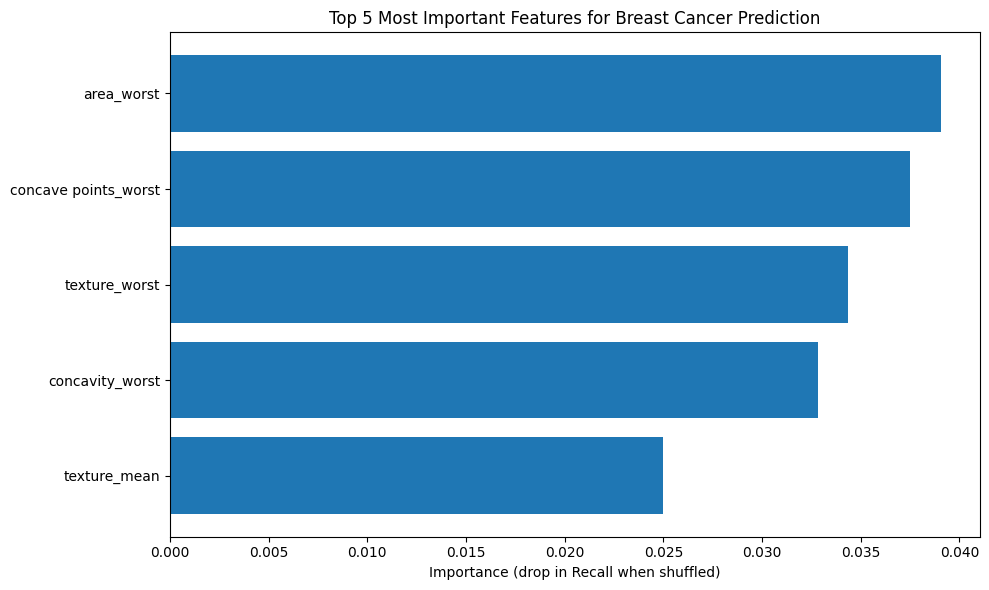


💡 Interpretation: The top feature is 'area_worst' with importance 0.039
This means shuffling this feature causes the recall score to drop by approximately 0.039


In [19]:
# Your turn: calculate permutation importance and identify top 5 features

# Calculate permutation importance on test set for the best model (RF2)
perm_importance_cancer = permutation_importance(
    best_rf_model, # Use the best model identified in Challenge 4
    X_test_cancer, # Use the test set
    y_test_cancer, # Use the test set target
    n_repeats=10,
    random_state=RANDOM_STATE,
    # For classification, scoring can be 'accuracy', 'precision', 'recall', 'f1'
    # Since recall is important for this problem, we'll use 'recall'
    scoring='recall'
)

# Create DataFrame for easy viewing
importance_df_cancer = pd.DataFrame({
    'feature': X_cancer.columns, # Use original feature names
    'importance': perm_importance_cancer.importances_mean
}).sort_values('importance', ascending=False)

print("Feature Importance (Permutation Method) for Breast Cancer Prediction:")
display(importance_df_cancer)

# Identify top 5 features
top_5_features_cancer = importance_df_cancer.head(5)

print("\nTop 5 Most Important Features:")
print(top_5_features_cancer)


# Visualize top 5 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_5_features_cancer)), top_5_features_cancer['importance'])
plt.yticks(range(len(top_5_features_cancer)), top_5_features_cancer['feature'])
plt.xlabel('Importance (drop in Recall when shuffled)')
plt.title('Top 5 Most Important Features for Breast Cancer Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n💡 Interpretation: The top feature is '{top_5_features_cancer.iloc[0]['feature']}' with importance {top_5_features_cancer.iloc[0]['importance']:.3f}")
print(f"This means shuffling this feature causes the recall score to drop by approximately {top_5_features_cancer.iloc[0]['importance']:.3f}")

### Challenge 6 — Create and Interpret Partial Dependence Plot

**Question:** Create a partial dependence plot (PDP) for the most important feature from Challenge 5 to understand HOW it influences cancer predictions.

**Your Task:**
1. Identify the #1 most important feature from Challenge 5
2. Create a partial dependence plot for this feature using your best random forest
3. Interpret the plot by answering:
   - As this feature increases, does malignancy probability increase or decrease?
   - Is the relationship linear or non-linear?
   - Are there any threshold effects (sudden changes)?
   - What does this tell us about cancer diagnosis?

**Clinical Interpretation:** If the most important feature is something like `radius_mean` (cell size), you might find that larger cells are associated with higher cancer probability. This aligns with medical knowledge that cancerous cells often grow larger than normal cells.

**Hint:** Chapter 27, "Exploring Prediction Behavior Across Variables" section explains PDPs:
```python
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(
    model, X_train, features=['feature_name']
)
```

**Remember:** PDPs show the average predicted probability across all observations as we vary one feature.

Creating Partial Dependence Plot for: area_worst


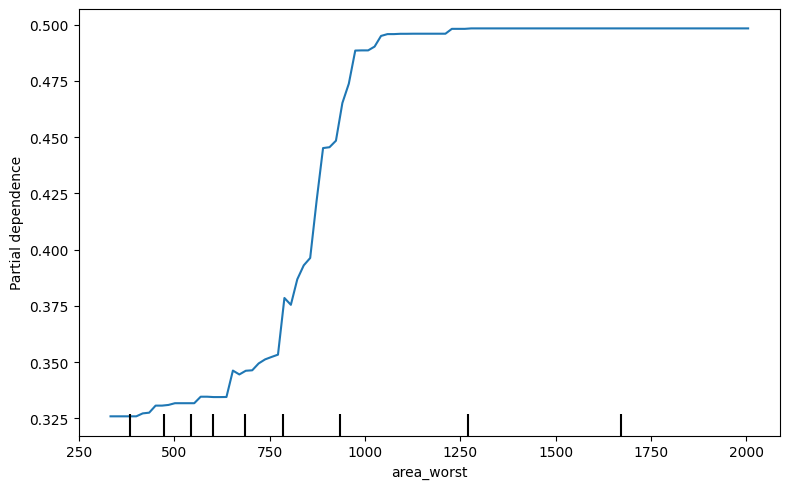


💡 How to read this plot:
- X-axis: Values of area_worst
- Y-axis: Predicted probability of Malignancy (1)
- The line shows how the predicted probability changes as area_worst increases
- Steep slopes indicate strong effects; flat regions indicate weak effects


In [20]:
# Your turn: create PDP for the most important feature and interpret

# Identify the #1 most important feature from Challenge 5
top_feature_cancer = importance_df_cancer.iloc[0]['feature']

print(f"Creating Partial Dependence Plot for: {top_feature_cancer}")

# Create PDP
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    best_rf_model, # Use the best model
    X_train_cancer, # Use the training data to calculate grid points
    features=[top_feature_cancer],
    ax=ax
)
plt.tight_layout()
plt.show()

print(f"\n💡 How to read this plot:")
print(f"- X-axis: Values of {top_feature_cancer}")
print(f"- Y-axis: Predicted probability of Malignancy (1)")
print(f"- The line shows how the predicted probability changes as {top_feature_cancer} increases")
print(f"- Steep slopes indicate strong effects; flat regions indicate weak effects")

## 🎓 Lab Wrap-Up & Reflection

### ✅ What You Accomplished

Congratulations! In this lab, you:
- **Built decision tree models** and explored how max_depth affects the bias-variance tradeoff
- **Constructed random forest models** and tuned multiple hyperparameters (n_estimators, max_depth, max_features)
- **Compared model performance** across different configurations to select the best approach
- **Calculated permutation importance** to identify which features drive cancer predictions
- **Created partial dependence plots** to understand how features influence malignancy probability
- **Applied tree-based methods** to a real medical classification problem

### 🤔 Reflection Questions

Take 2-3 minutes to consider:

1. **Model Comparison**: Why did random forests outperform single decision trees? What advantage comes from combining many trees?

2. **Feature Importance**: Which cell characteristics were most predictive of cancer? Do these align with medical knowledge about cancer cells?

3. **Interpretability vs. Accuracy**: Decision trees are easier to visualize than random forests. Is the accuracy gain from random forests worth the loss of interpretability for medical diagnosis?

4. **Business Impact**: How would you explain your model's predictions to a physician who doesn't have data science training? What role do PDPs play in building trust?

5. **Actionable vs. Predictive**: Some features are important for prediction but not actionable (e.g., cell radius_mean). How does this distinction matter for clinical decision-making?

### 🔗 Connection to Course Goals

This lab bridges several key data science concepts:
- **Supervised learning**: Classification with tree-based methods
- **Model evaluation**: Comparing models using multiple metrics
- **Interpretability**: Understanding what drives predictions
- **Business application**: Medical diagnosis where false negatives have serious consequences

Tree-based methods are among the most widely used algorithms in practice because they:
- Handle non-linear relationships automatically
- Require minimal data preprocessing
- Provide feature importance insights
- Work well out-of-the-box with minimal tuning

### 📋 Next Steps

- **Homework**: This lab serves as your Week 11 homework. Make sure all challenges are complete and well-documented.
- **Next Week**: We'll explore gradient boosting methods (XGBoost, LightGBM) which often outperform random forests by building trees sequentially rather than independently.
- **Additional Practice**: Try applying these techniques to other datasets from previous weeks (Default, Ames housing, etc.)

---
**💾 Save your work** and ensure all code cells run successfully from top to bottom!

## 🚨 Troubleshooting & Common Issues

**Issue 1: "ImportError: cannot import name 'permutation_importance'"**
- **Solution:** Make sure you're using scikit-learn version 0.22 or higher. Update with: `pip install --upgrade scikit-learn`

**Issue 2: "My decision tree has 100% training accuracy but poor test accuracy"**
- **Solution:** This is overfitting! Your tree is too deep. Try:
  - Reducing `max_depth` to 5-10
  - Increasing `min_samples_split` to 20-50
  - Increasing `min_samples_leaf` to 10-20

**Issue 3: "Random forest takes a long time to train"**
- **Solution:** This is normal for large forests. Speed it up by:
  - Reducing `n_estimators` (100 is usually sufficient)
  - Adding `n_jobs=-1` to use all CPU cores
  - Limiting `max_depth` to prevent very deep trees

**Issue 4: "Permutation importance shows negative values"**
- **Solution:** Small negative values are normal—they mean shuffling that feature slightly improved performance by chance. These features are not important.

**Issue 5: "My PDP looks very jagged/noisy"**
- **Solution:** This happens in sparse data regions. Try:
  - Increasing `grid_resolution` parameter
  - Checking the data distribution (rug plot) to see where you have few observations
  - Focus interpretation on regions with dense data

**Issue 6: "AttributeError: 'DecisionTreeClassifier' has no attribute 'feature_importances_'"**
- **Solution:** You must `.fit()` the model before accessing feature importance. Make sure you've trained the model first.

**Issue 7: "All my random forests perform similarly regardless of hyperparameters"**
- **Solution:** This could mean:
  - The default parameters are already good for this dataset
  - The dataset is relatively simple and most reasonable configurations work well
  - Try more extreme parameter values to see bigger differences

### General Debugging Tips:

1. **Check shapes**: Always verify `X_train.shape`, `y_train.shape` match expectations
2. **Print intermediate results**: Don't wait until the end to check if things work
3. **Start simple**: Build one model successfully before trying multiple configurations
4. **Read error messages carefully**: They often tell you exactly what's wrong
5. **Use RANDOM_STATE consistently**: This ensures reproducible results for debugging
6. **Refer to the chapters**: The code examples in Chapters 25-27 show complete working syntax

### Getting Help:

If you're stuck:
1. Re-read the relevant chapter section mentioned in the challenge hint
2. Check the Part 1 TA walkthrough for similar code patterns
3. Ask your group members or neighboring groups
4. Raise your hand and ask the instructor
5. Post on Canvas discussion board with your specific error message